In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('most_streamed_spotify_songs_2023.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)

In [3]:
#track_name: Name of the song
#artist(s)_name: Name of the artist(s) of the song
#artist_count: Number of artists contributing to the song
#released_year: Year when the song was released
#released_month: Month when the song was released
#released_day: Day of the month when the song was released
#in_spotify_playlists: Number of Spotify playlists the song is included in
#in_spotify_charts: Presence and rank of the song on Spotify charts
#streams: Total number of streams on Spotify
#in_apple_playlists: Number of Apple Music playlists the song is included in
#in_apple_charts: Presence and rank of the song on Apple Music charts
#in_deezer_playlists: Number of Deezer playlists the song is included in
#in_deezer_charts: Presence and rank of the song on Deezer charts
#in_shazam_charts: Presence and rank of the song on Shazam charts
#bpm: Beats per minute, a measure of song tempo
#key: Key of the song
#mode: Mode of the song (major or minor)
#danceability_%: Percentage indicating how suitable the song is for dancing
#valence_%: Positivity of the song's musical content
#energy_%: Perceived energy level of the song
#acousticness_%: Amount of acoustic sound in the song
#instrumentalness_%: Amount of instrumental content in the song
#liveness_%: Presence of live performance elements
#speechiness_%: Amount of spoken words in the song

In [4]:
#df.describe()
print(f'columns : {df.shape[1]}\nrows : {df.shape[0]}')
df.info()

columns : 24
rows : 953
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key             

In [5]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [6]:
#-- Questions --
#What is the most popular track?
#What is the most popular artist?
#What are the top 10 popular artists? (popularity=> most added in playlists cumulatively)
#What are the top 10 artists with the most songs?'
#Does people pay attention in bpm, and in which platform?
#How dancability correlated with other parameters?
#In overall what coorelations we have?

In [7]:
#What is the most popular track? == What track shows the most in all playlists?

track_occurrences = df.groupby(['track_name', 'artist(s)_name'])[['in_spotify_playlists', 'in_apple_playlists']].sum()
track_occurrences['total_occurrences'] = track_occurrences['in_spotify_playlists'] + track_occurrences['in_apple_playlists']
track_occurrences_sorted = track_occurrences.sort_values(by='total_occurrences', ascending=False)
track_occurrences_sorted.head(10)

,,in_spotify_playlists,in_apple_playlists,total_occurrences
track_name,artist(s)_name,,,
Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,203,53101
Mr. Brightside,The Killers,51979,306,52285
Wake Me Up - Radio Edit,Avicii,50887,315,51202
Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,265,50256
Take On Me,a-ha,44927,34,44961
Blinding Lights,The Weeknd,43899,672,44571
One Dance,"Drake, WizKid, Kyla",43257,433,43690
Somebody That I Used To Know,"Gotye, Kimbra",42798,217,43015
Everybody Wants To Rule The World,Tears For Fears,41751,101,41852


In [15]:
# Top 10 artists with most songs
artist_count = df['artist(s)_name'].value_counts()
artist_count.head(10)

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

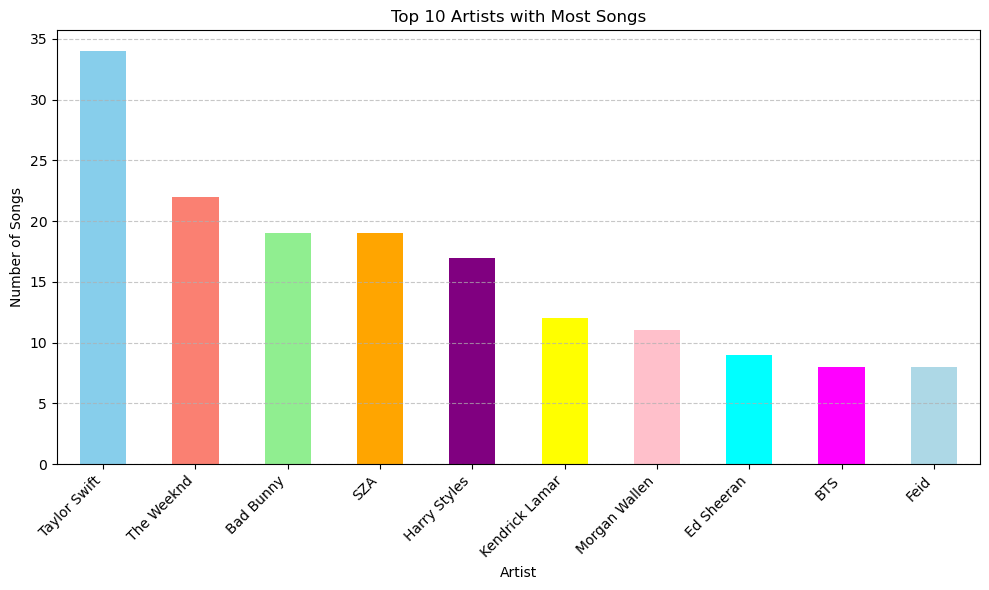

In [9]:
artist_count = df['artist(s)_name'].value_counts().head(10)

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'lightblue']

plt.figure(figsize=(10, 6))
artist_count.plot(kind='bar', color=colors)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

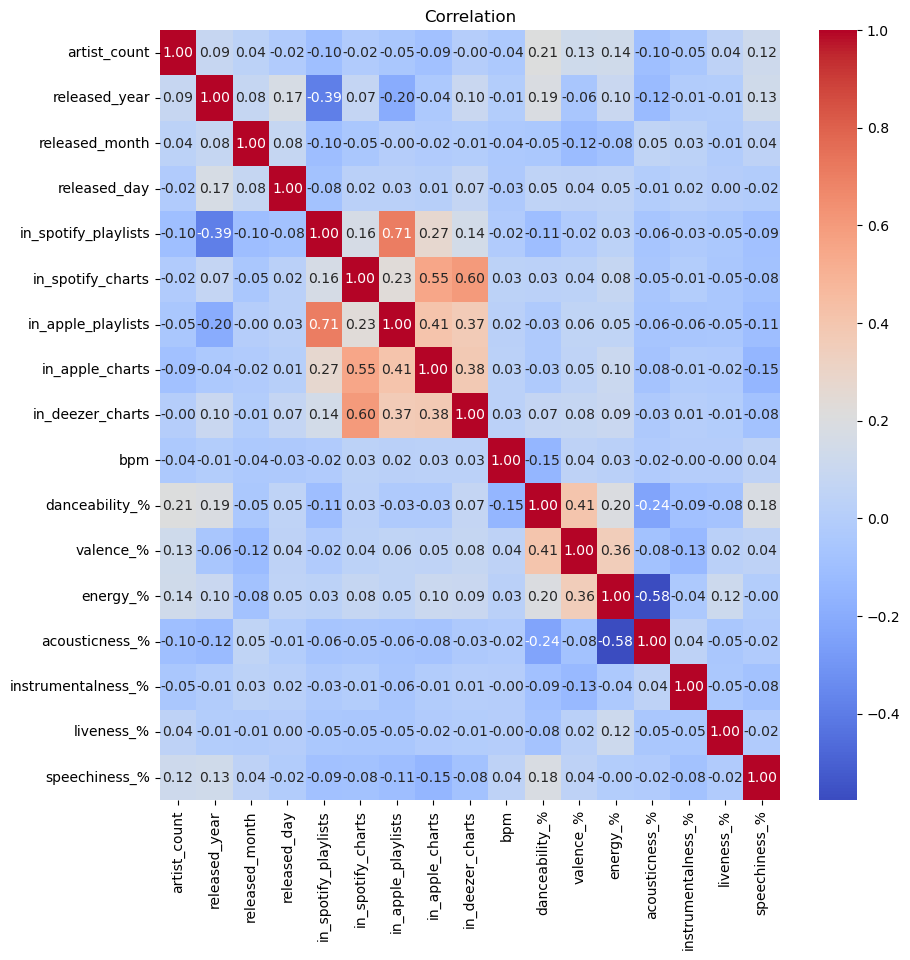

In [43]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation')
plt.show()